### Step 1: Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep=',')

In [3]:
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep=',')

### Step 2: Visualization of the Dataset

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
training = np.array(fashion_train_df, dtype='float32')

In [8]:
testing = np.array(fashion_test_df, dtype='float32')

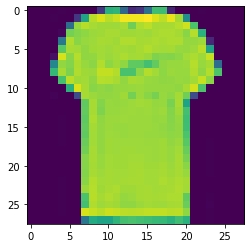

In [9]:
plt.imshow(training[10, 1:].reshape(28,28))

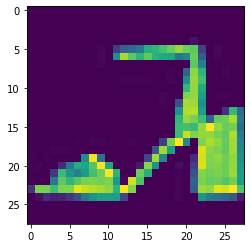

In [10]:
plt.imshow(training[60, 1:].reshape(28,28))

1.0

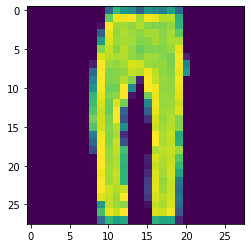

In [11]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i, 0]
label

Remember the 10 classes decoding is a folows:
- 0: T-Shirt
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

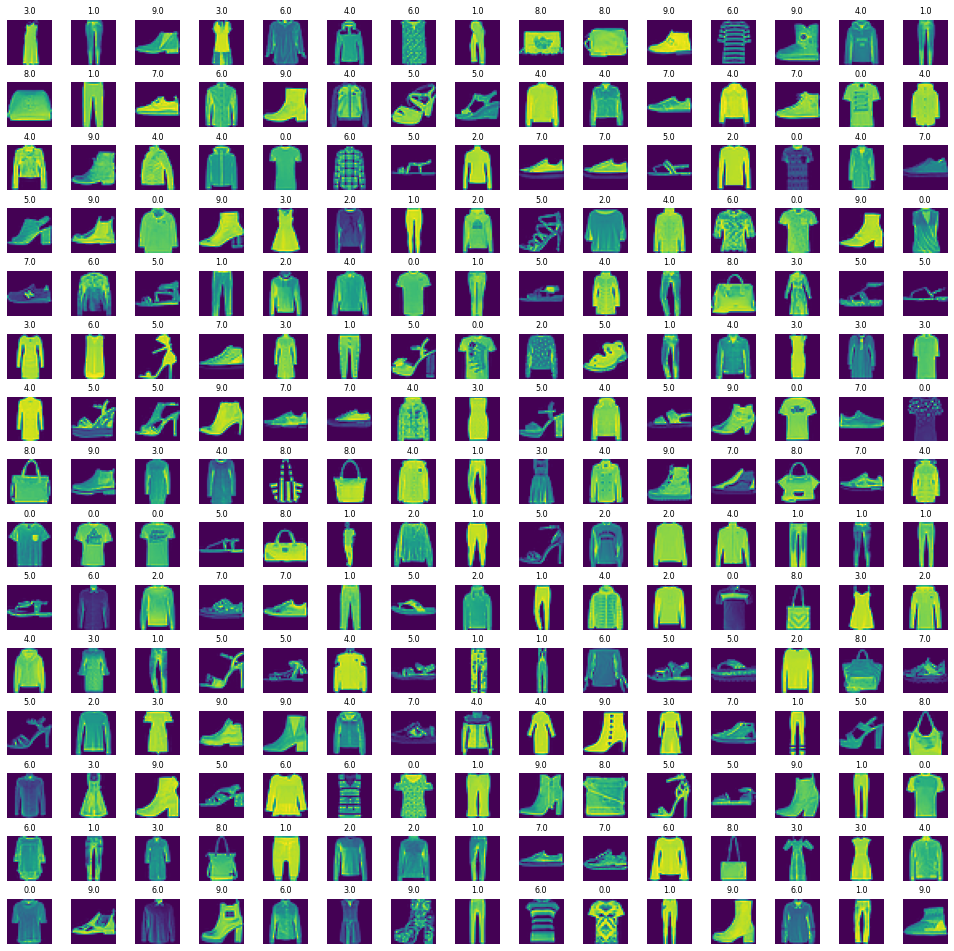

In [12]:
w_grid = 15
l_grid = 15

# fig, axes = plt.subplots(l_grid, w_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, w_grid*l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index, 1:].reshape((28,28)) )
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

### Step 3: Traing the Model

In [13]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [14]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [17]:
x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

In [18]:
x_train.shape

(48000, 28, 28, 1)

In [19]:
import keras

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()

In [22]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 29, 1), activation="relu"))

In [23]:
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
cnn_model.add(Flatten())

In [26]:
cnn_model.add(Dense(units=32, activation='relu'))

In [27]:
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [28]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

In [29]:
epochs = 50

In [34]:
cnn_model.fit(x_train, y_train, batch_size=52, epochs=epochs, verbose=1, validation_data = (x_validate, y_validate))

Epoch 1/50
924/924 [==============================] - 4s 4ms/step - loss: 1.0446 - accuracy: 0.6578 - val_loss: 0.5669 - val_accuracy: 0.7887
Epoch 2/50
924/924 [==============================] - 4s 4ms/step - loss: 0.5098 - accuracy: 0.8126 - val_loss: 0.4911 - val_accuracy: 0.8142
Epoch 3/50
924/924 [==============================] - 4s 5ms/step - loss: 0.4502 - accuracy: 0.8348 - val_loss: 0.4302 - val_accuracy: 0.8451
Epoch 4/50
924/924 [==============================] - 6s 7ms/step - loss: 0.4255 - accuracy: 0.8465 - val_loss: 0.4219 - val_accuracy: 0.8497
Epoch 5/50
924/924 [==============================] - 5s 6ms/step - loss: 0.4085 - accuracy: 0.8514 - val_loss: 0.4063 - val_accuracy: 0.8508
Epoch 6/50
924/924 [==============================] - 5s 5ms/step - loss: 0.3950 - accuracy: 0.8549 - val_loss: 0.3929 - val_accuracy: 0.8550
Epoch 7/50
924/924 [==============================] - 4s 5ms/step - loss: 0.3746 - accuracy: 0.8636 - val_loss: 0.3972 - val_accuracy: 0.8522
Epoch 

### Step 4: Evaluating the Model

In [35]:
evaluation = cnn_model.evaluate(x_test, y_test)

print("Test Accuracy: {:.3f}".format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8788
Test Accuracy: 0.879


In [36]:
predicted_classes = cnn_model.predict_classes(x_test)

E:\Proyectos\Jupyter\ve_ml37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

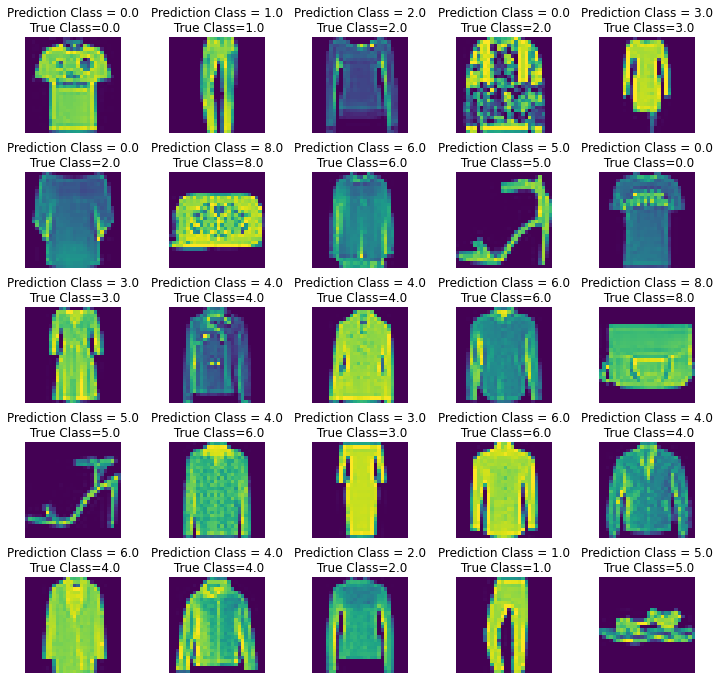

In [39]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class={:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis("off")
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

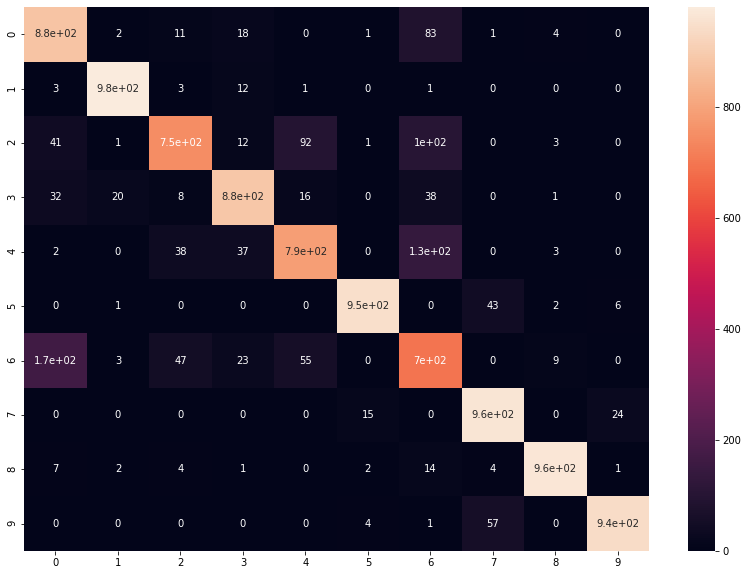

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [42]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.88      0.83      1000
     Class 1       0.97      0.98      0.98      1000
     Class 2       0.87      0.75      0.81      1000
     Class 3       0.90      0.89      0.89      1000
     Class 4       0.83      0.79      0.81      1000
     Class 5       0.98      0.95      0.96      1000
     Class 6       0.65      0.70      0.67      1000
     Class 7       0.90      0.96      0.93      1000
     Class 8       0.98      0.96      0.97      1000
     Class 9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

